<a href="https://colab.research.google.com/github/wallik2/University-stuff/blob/main/Intro_Data_Sci/Week_7_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

<fieldset>

<font size="5">Quick Intro : </font> <br>

Function: Clean the unusable data to usable



---



<font size="4"><u>3 steps to clean the data</u></font>

1. Data Cleaning
2. Feature Scaling
3. Encoding the categorical data

## 1) Data Cleaning

step1: deal with **Missing value** <br>
step2: deal with the **Outlier**

#### I. Removing the row with missing value 

In [ ]:
#Using Dropna()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
rawdata = {"high": [166,np.nan,155,np.nan,180],
           "weight": [70, 68, 60, 64, 80]}

In [ ]:
df = pd.DataFrame(rawdata)     #DataFrame 

data = df.dropna()             #DataFrame but no missing value

In [ ]:
print("Raw Data")
display(df)

print("\n\n\nRaw Data but no missing value")
display(data)


Raw Data


,high,weight
0,166.0,70
1,NaN,68
2,155.0,60
3,NaN,64
4,180.0,80





Raw Data but no missing value


,high,weight
0,166.0,70
2,155.0,60
4,180.0,80




---



#### II. Fill the row with missing value by mean  


In [ ]:
 #Using replace()

In [ ]:
rawdata = {"high": [166,np.nan,155,np.nan,180],
           "weight": [70, 68, 60, 64, 80]}

In [ ]:
df = pd.DataFrame(rawdata)
fill_data = df.replace(np.NaN, df['high'].mean())

In [ ]:
print('Filled data')

display(fill_data)

Filled data


,high,weight
0,166.0,70
1,167.0,68
2,155.0,60
3,167.0,64
4,180.0,80


#### III. Deal with an Outlier  

In [ ]:
import seaborn as sns
from scipy import stats

In [ ]:
rawdata={"height": [166,171,155,164,180,300],
         "weight": [70,68,60,64,80,77]}

df = pd.DataFrame(rawdata)

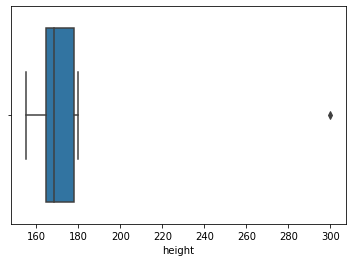

In [ ]:
sns.boxplot(x= df.height)   

#sns.boxplot(x= df.height)       : If you prefer X-axis boxplot


In [ ]:
z = np.abs(stats.zscore(df.height))

print("Z score = ", z)

#Z score = [0.46611801 0.36623558 0.68585935 0.50607098, 0.1864472 2.21073111]

Z score =  [0.46611801 0.36623558 0.68585935 0.50607098 0.1864472  2.21073111]


In [ ]:
remove_outlier = df[ z < 2]        # We pick the criteria to get rid outlir by should not have z < 2   (อาจารย์บอกไม่ต้องเลือก 1.96 เพราะมันจะประมวลช้ากว่า ให้เลือก 2 เลย)
print(remove_outlier )

   height  weight
0     166      70
1     171      68
2     155      60
3     164      64
4     180      80


In [ ]:
# "high": [166,171,155,164,180,300],

# as you can see that the box plot say that the height range value should be in this range [150,180]
# while There is someone who have height = 300, so we consider him as an Outlier



 ---



## 2) Feature Scaling

#### I) Normalization 

- Range from 0 to 1
- Use when the data doesn't follow Normal Distribution

- This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

- Sensitive to outlier (but don't worry if we rid the outliers already)

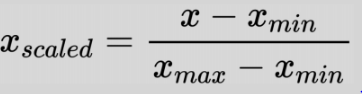

In [ ]:
# use MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
rawdata={"high": [166,171,155,164,180],
         "weight": [70,68,60,64,80]}

df = pd.DataFrame(rawdata)

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
# Normalize the Raw_data

norm_data = min_max_scaler.fit_transform(df)
norm_data = pd.DataFrame(norm_data,columns=['high','weight'])

In [ ]:
# Raw data _ without Normalization

display(df)

,high,weight
0,166,70
1,171,68
2,155,60
3,164,64
4,180,80


In [ ]:
# Normalized Raw data 

display(norm_data)

,high,weight
0,0.44,0.5
1,0.64,0.4
2,0.00,0.0
3,0.36,0.2
4,1.00,1.0


#### II) Standardization 

- Range from -∞ to ∞
- Use when the data follow Normal Distribution
- However, this does not have to be necessarily true. Also, unlike normalization,
standardization does not have a bounding range. So, even if you have outliers in your data,
they will not be affected by standardization.

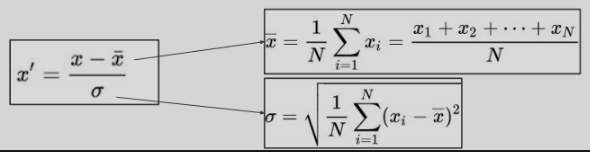

In [ ]:
# use StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Prepare Data
rawdata={"high": [166,171,155,164,180],
         "weight": [70,68,60,64,80]}

df = pd.DataFrame(rawdata)

In [ ]:
# Making the StandardScaler

standard_scaler = StandardScaler()

In [ ]:
standardized_data = standard_scaler.fit_transform(df)
standardized_data = pd.DataFrame(standardized_data, columns =['high','weight'])

In [ ]:
display(standardized_data)

,high,weight
0,-0.145779,0.237356
1,0.461633,-0.059339
2,-1.482085,-1.246121
3,-0.388744,-0.652730
4,1.554974,1.720833


## 3) Encoding the categorical data

#### I. Label Encoder

- Suitable for Ordinal data (such as score range(from Excellent to poor)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:

rawdata={"country":['india','US','Japan','US','Japan'],
          "age": [44,34,46,35,23],
          "salary": [72000,65000,98000,45000,34000]}


df = pd.DataFrame(rawdata)          

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
label_data = label_encoder.fit_transform(df['country'])
df['label_country'] = label_data


In [ ]:
display(df)

,country,age,salary,label_country
0,india,44,72000,2
1,US,34,65000,1
2,Japan,46,98000,0
3,US,35,45000,1
4,Japan,23,34000,0


In [ ]:
# Check the class
label_encoder.classes_

array(['Japan', 'US', 'india'], dtype=object)

#### II. One Hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Prepare data
rawdata={"country": ['india','US','Japan','US','Japan'],
          "age": [44,34,46,35,23],
         "salary": [72000,65000,98000,45000,34000]}

df = pd.DataFrame(rawdata)

In [ ]:
OneHot_Encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:

                                                                         
label = OneHot_Encoder.fit_transform(df[['country']]).toarray()          # convert to dense matrix (array) from SPARSE MATRIX!!

One_enc_df = pd.DataFrame(label ,columns= ['Japan', 'US', 'india'])

df = df.join(One_enc_df )

In [ ]:
display(df)

,country,age,salary,Japan,US,india
0,india,44,72000,0.0,0.0,1.0
1,US,34,65000,0.0,1.0,0.0
2,Japan,46,98000,1.0,0.0,0.0
3,US,35,45000,0.0,1.0,0.0
4,Japan,23,34000,1.0,0.0,0.0


In [ ]:
print(OneHot_Encoder.categories_)

[array(['Japan', 'US', 'india'], dtype=object)]


# Application of Feature Scaling



---


### 1. Extracting Word from Customer Comment

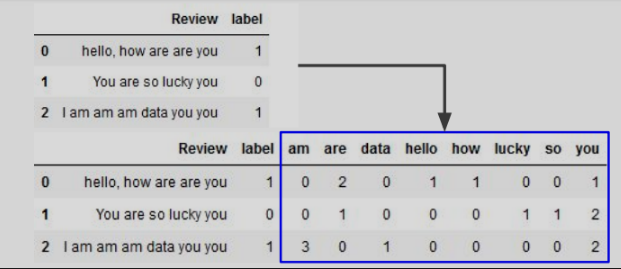

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # To extract the words in a sentence

In [ ]:
df = pd.DataFrame({"Review": ['hello, how are are you',
                   'You are so lucky you ',
                   'I am am am data you you'],
                    "label": [1,0,1]})

In [ ]:
# select word from the specific column
textdata = df['Review']           

In [ ]:
# Making the counter
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(textdata)

print(cv.get_feature_names()) #splitting words

['am', 'are', 'data', 'hello', 'how', 'lucky', 'so', 'you']


In [ ]:
# X is now a Sparse matrix (but we can't plug this type of matrix to dataframe, so we need to convert to Dense Matrix by X.array )

# We can check by doing this
X 

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [ ]:
encode = pd.DataFrame(X.toarray() ,columns = cv.get_feature_names())       #This line takes long time since we convert from sparse Matrix to dense matrix (array)
new_df = df.join(encode)

In [ ]:
display(new_df)

,Review,label,am,are,data,hello,how,lucky,so,you
0,"hello, how are are you",1,0,2,0,1,1,0,0,1
1,You are so lucky you,0,0,1,0,0,0,1,1,2
2,I am am am data you you,1,3,0,1,0,0,0,0,2
